# Decision Theory: Exercises

Alípio Jorge, 2021

1. Suppose the true classes of a data set are $y=<s,s,s,s,n,n,n,n>$ and that model $A$ gives predicted classes $\hat{y}=<s,s,n,s,n,s,s,s>$.
    - What is the absolute value of the zero-one loss for this data? Calculate by hand and then use the `zero_one_loss`function from `sklearn.metrics`.
    - Assume that $\Pr(s|X) = \Pr(n|X)$. What is the expected prediction error (use the proportion of the loss obtained with the sample)?
    - What is the EPE if $\Pr(s|X) = 0.7$ and $\Pr(n|X)=0.3$ ?
    - Draw a plot of EPE with $\Pr(s|X)$ varying from 0 to 1.
    - Calculate EPE for each of the two class distributions above but with the following misclassification costs: classifying 's' as 'n' costs 2, classifying 'n' as 's' costs 10.
    - To which value of $\Pr(s|X)$ corresponds the optimal EPE?
2. Explain why the k Nearest Neighbor classifier is not the perfect Bayes classifier.  
1. Generate two blobs from two bivariate normal distributions. One of 50 points representing class 'blue' with center (3,5) and standard deviation 1.5 and another of 50 points representing class 'orange' with center (6,5) and standard deviation 1.5.
    - Plot the sample.
    - Plot the Bayes Decision Boundary. Suggestion: use the `multivariate_normal` function from `scipy.stats`. 
    - Compare the BDB with the result of 5NN.
2. Generate two blobs from two bivariate normal distributions. One of 50 points representing class 'blue' with center (3,5) and standard deviation 2 and another of 50 points representing class 'orange' with center (6,5) and standard deviation 1.
    - Plot the sample.
    - Plot the Bayes Decision Boundary. Suggestion: use the `multivariate_normal` function from `scipy.stats`. 
    - Compare the BDB with the result of 5NN.
    - Compare BDB using other values for k.


In [20]:
import numpy as np

#1
y=['𝑠','𝑠','𝑠','𝑠','𝑛','𝑛','𝑛','𝑛']
yp=['𝑠','𝑠','𝑛','𝑠','𝑛','𝑠','𝑠','𝑠']
abs_zol = sum([y[i]!=yp[i] for i in range(len(y))])
print('abs_zol =',abs_zol)

#EPE equal prob
zols = sum([y[i]!=yp[i] and y[i]=='𝑠' for i in range(len(y))])/4
zoln =  sum([y[i]!=yp[i] and y[i]=='n' for i in range(len(y))])/4
Prs = 0.5
Prn = 0.5
EPE = zols*Prs+zoln*Prn
print('0.5/0.5','zol(s)=',zols,'zol(n)=',zoln,'EPE =',EPE)

#EPE equal 0.7 - 0.3
Prs = 0.7
Prn = 0.3
EPE = zols*Prs+zoln*Prn
print('0.7/0.3','zol(s)=',zols,'zol(n)=',zoln,'EPE =',EPE)


abs_zol = 4
0.5/0.5 zol(s)= 0.25 zol(n)= 0.0 EPE = 0.125
0.7/0.3 zol(s)= 0.25 zol(n)= 0.0 EPE = 0.175


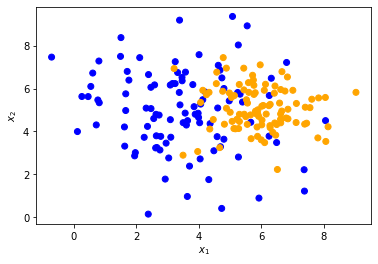

In [136]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import colors

n_points=100
std1=2
std2=1

X,_ = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)], 
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)

y=np.array([0]*n_points+[1]*n_points)

cmap = colors.ListedColormap(['blue','orange'])

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

In [137]:
# 3

# How to determine the most probable class from the distributions
# 

from scipy.stats import multivariate_normal

# Make sure you understand the covariance matrix
dens1 = multivariate_normal(mean=[3,5],cov=[[std1,0],[0,std1]])
dens2 = multivariate_normal(mean=[6,5],cov=[[std2,0],[0,std2]])

# we can define a new model that does not have to be learned as a python class
# this is the bayesian classifier
# the predict method can be used in the standards way

class bc:
    def __init__(self,dens1,dens2):
        self.dens1 = dens1
        self.dens2 = dens2
    def unipredict(self,x):
        if self.dens1.pdf(x)>self.dens2.pdf(x):
            return 0
        else:
            return 1
    def predict(self,X):
        return np.array(list(map(lambda x: self.unipredict(x),X)))

# how to use
model=bc(dens1,dens2)
model.predict(np.array([[3,5],[2,1],[10,5]]))


array([0, 0, 1])

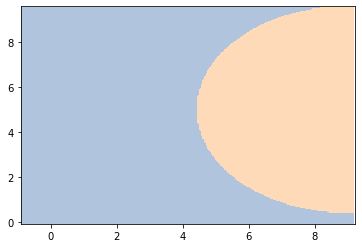

In [138]:
# use the function that plots boundaries
from matplotlib import colors
import matplotlib.pyplot as plt 

def plot_classifier_boundary(model,X,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))

# We use the model 'bc' to draw the Bayes Decision Boundary
    
plot_classifier_boundary(model,X)

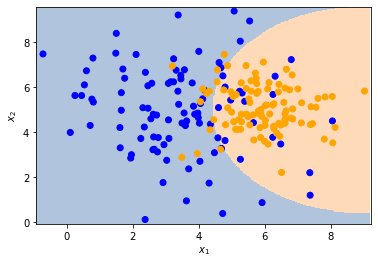

In [139]:
plot_classifier_boundary(model,X)
plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

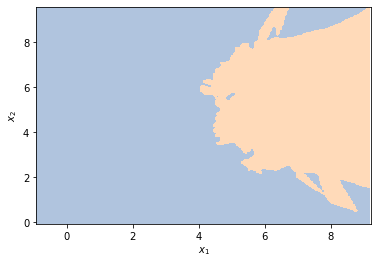

In [140]:
from sklearn.neighbors import KNeighborsClassifier as kNC

model=kNC(n_neighbors=10).fit(X,y)

plot_classifier_boundary(model,X)
#plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');